In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

In [4]:
data = pd.read_csv('3.12. Example.csv')
data[:10]

,Satisfaction,Loyalty
0,4,-1.33
1,6,-0.28
2,5,-0.99
3,7,-0.29
4,4,1.06
5,1,-1.66
6,10,-0.97
7,8,-0.32
8,8,1.02
9,8,0.68


<function matplotlib.pyplot.show(*args, **kw)>

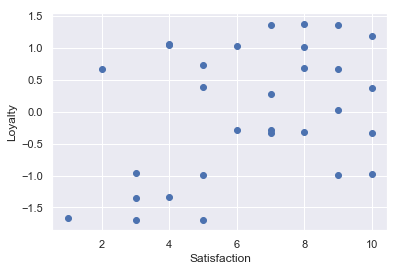

In [3]:
plt.scatter(data['Satisfaction'],data['Loyalty'])
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')
plt.show

In [4]:
x = data
kmeans = KMeans(2)
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

<function matplotlib.pyplot.show(*args, **kw)>

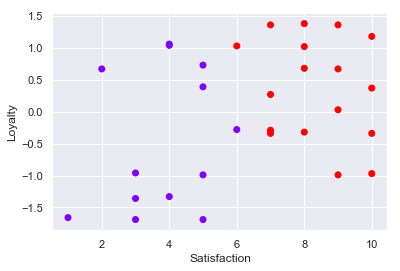

In [5]:
clusters = x.copy()
clusters['Cluster_predicted'] = kmeans.fit_predict(x)
plt.scatter(data['Satisfaction'],data['Loyalty'],c=clusters['Cluster_predicted'],cmap='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')
plt.show

### As you can see that graph is segregated at Satisfaction=6, so there is some problem as there is an exact vertical line for separation

#### Standardisation

In [6]:
from sklearn import preprocessing
x_scaled = preprocessing.scale(x)
x_scaled

C:\Users\risha\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  


array([[-0.93138063, -1.3318111 ],
       [-0.15523011, -0.28117124],
       [-0.54330537, -0.99160391],
       [ 0.23284516, -0.29117733],
       [-0.93138063,  1.05964534],
       [-2.09560642, -1.6620122 ],
       [ 1.39707095, -0.97159172],
       [ 0.62092042, -0.32119561],
       [ 0.62092042,  1.01962097],
       [ 0.62092042,  0.67941378],
       [ 1.39707095, -0.3412078 ],
       [-0.54330537,  0.38923705],
       [-0.54330537, -1.69203048],
       [-1.70753116,  0.66940768],
       [ 0.23284516,  0.26916393],
       [ 1.00899568,  1.35982816],
       [ 0.62092042,  1.37984035],
       [ 0.23284516,  1.35982816],
       [ 0.23284516, -0.3412078 ],
       [ 1.00899568,  0.66940768],
       [ 1.39707095,  1.17971847],
       [-1.31945589, -1.69203048],
       [-0.93138063,  1.03963316],
       [-1.31945589, -0.96158562],
       [-0.15523011,  1.02962706],
       [ 1.00899568, -0.99160391],
       [ 1.39707095,  0.36922486],
       [ 1.00899568,  0.02901767],
       [-1.31945589,

## The Elbow Method

Text(0, 0.5, 'WCSS')

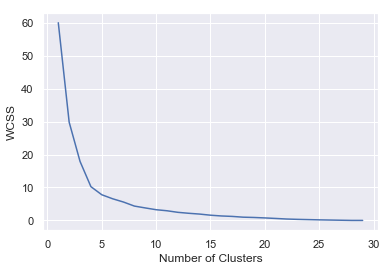

In [7]:
wcss = []
for i in range(1,len(x)):
    kmeans = KMeans(i)
    kmeans.fit(x_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,len(x)),wcss)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')

### We will plot the original data now but the clusters will be based on standardised values 
Let's try with 2 clusters first

In [11]:
kmeans_new = KMeans(2)
kmeans_new.fit(x_scaled)
clusters_new = x.copy()
clusters_new['Clusters_predicted'] = kmeans_new.fit_predict(x_scaled)
clusters_new

,Satisfaction,Loyalty,Clusters_predicted
0,4,-1.33,1
1,6,-0.28,0
2,5,-0.99,1
3,7,-0.29,0
4,4,1.06,0
5,1,-1.66,1
6,10,-0.97,0
7,8,-0.32,0
8,8,1.02,0
9,8,0.68,0


<function matplotlib.pyplot.show(*args, **kw)>

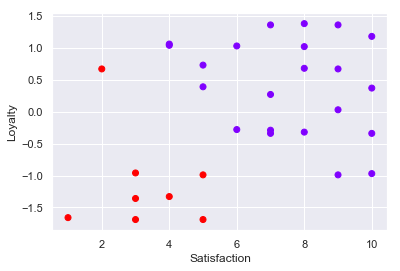

In [13]:
plt.scatter(data['Satisfaction'],data['Loyalty'],c=clusters_new['Clusters_predicted'],cmap='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')
plt.show

### The clusters changed from before, we will now try with 3 clusters

kmeans_new = KMeans(3)
kmeans_new.fit(x_scaled)
clusters_new = x.copy()
clusters_new['Clusters_predicted'] = kmeans_new.fit_predict(x_scaled)
plt.scatter(data['Satisfaction'],data['Loyalty'],c=clusters_new['Clusters_predicted'],cmap='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')
plt.show

### 4 clusters

<function matplotlib.pyplot.show(*args, **kw)>

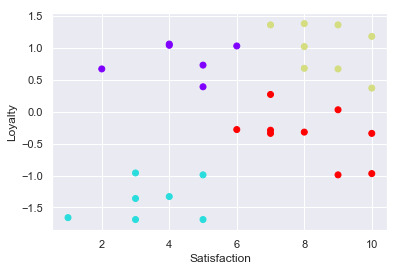

In [15]:
kmeans_new = KMeans(4)
kmeans_new.fit(x_scaled)
clusters_new = x.copy()
clusters_new['Clusters_predicted'] = kmeans_new.fit_predict(x_scaled)
plt.scatter(data['Satisfaction'],data['Loyalty'],c=clusters_new['Clusters_predicted'],cmap='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')
plt.show

### 5 Clusters

<function matplotlib.pyplot.show(*args, **kw)>

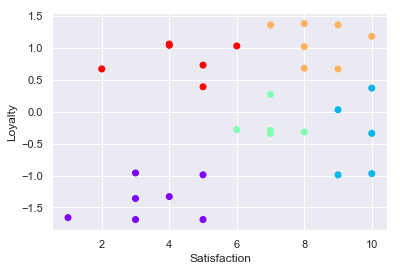

In [16]:
kmeans_new = KMeans(5)
kmeans_new.fit(x_scaled)
clusters_new = x.copy()
clusters_new['Clusters_predicted'] = kmeans_new.fit_predict(x_scaled)
plt.scatter(data['Satisfaction'],data['Loyalty'],c=clusters_new['Clusters_predicted'],cmap='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')
plt.show

### The one with 4 clusters is considered the best, although the one with 5 clusters further segments it but doesn't add much value, So it depends upon the problm at hand whether we use 4 or 5 cluster solution